In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt 
import seaborn as sns 

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/home-data-for-ml-course/sample_submission.csv
/kaggle/input/home-data-for-ml-course/sample_submission.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv.gz
/kaggle/input/home-data-for-ml-course/data_description.txt
/kaggle/input/home-data-for-ml-course/test.csv.gz
/kaggle/input/home-data-for-ml-course/train.csv
/kaggle/input/home-data-for-ml-course/test.csv


In [2]:
train_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/train.csv')
test_df = pd.read_csv('/kaggle/input/home-data-for-ml-course/test.csv')


In [3]:
train_df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
train_df.shape

(1460, 81)

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

 We have a few columns with missing values

In [6]:
missing_columns = train_df.isnull().sum()[train_df.isnull().sum() > 0].sort_values(ascending=False)
missing_columns

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
MasVnrType       872
FireplaceQu      690
LotFrontage      259
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
GarageCond        81
BsmtFinType2      38
BsmtExposure      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
Electrical         1
dtype: int64

In [7]:
train_df.describe()

,Id,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,56.897260,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,42.300571,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,20.000000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,50.000000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,70.000000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [8]:
housing = pd.concat([train_df,test_df])
housing

/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in greater
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1458: RuntimeWarning: invalid value encountered in greater
  has_large_values = (abs_vals > 1e6).any()
/usr/local/lib/python3.10/dist-packages/pandas/io/formats/format.py:1459: RuntimeWarning: invalid value encountered in less
  has_small_values = ((abs_vals < 10 ** (-self.digits)) & (abs_vals > 0)).any()
/usr/local/lib/python3.10/dist-packages/pan

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500.0
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1454,2915,160,RM,21.0,1936,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,6,2006,WD,Normal,NaN
1455,2916,160,RM,21.0,1894,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,4,2006,WD,Abnorml,NaN
1456,2917,20,RL,160.0,20000,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2006,WD,Abnorml,NaN
1457,2918,85,RL,62.0,10441,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,MnPrv,Shed,700,7,2006,WD,Normal,NaN


In [9]:
housing.drop('Id',axis=1,inplace=True)

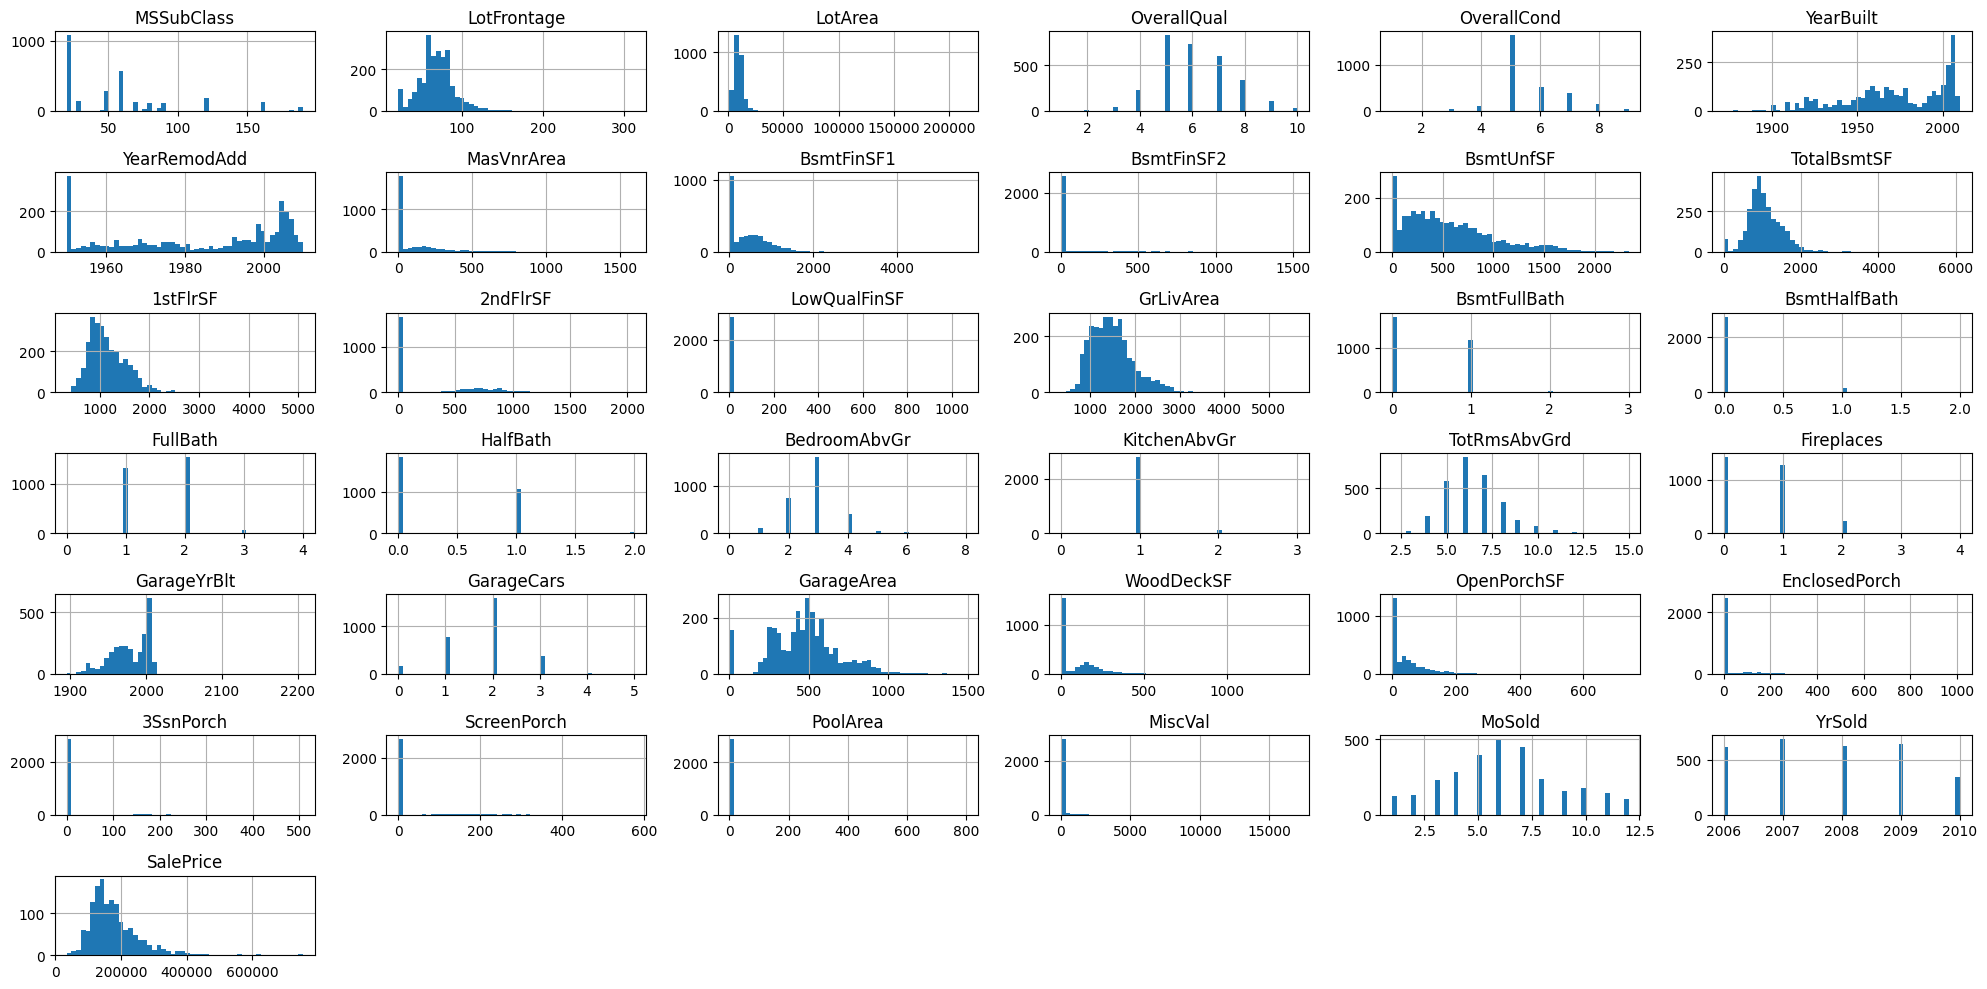

In [10]:
housing.hist(bins=50,figsize=(20,10))
plt.grid(True)
plt.tight_layout()
plt.show()

Most of the distributions appear skewed 

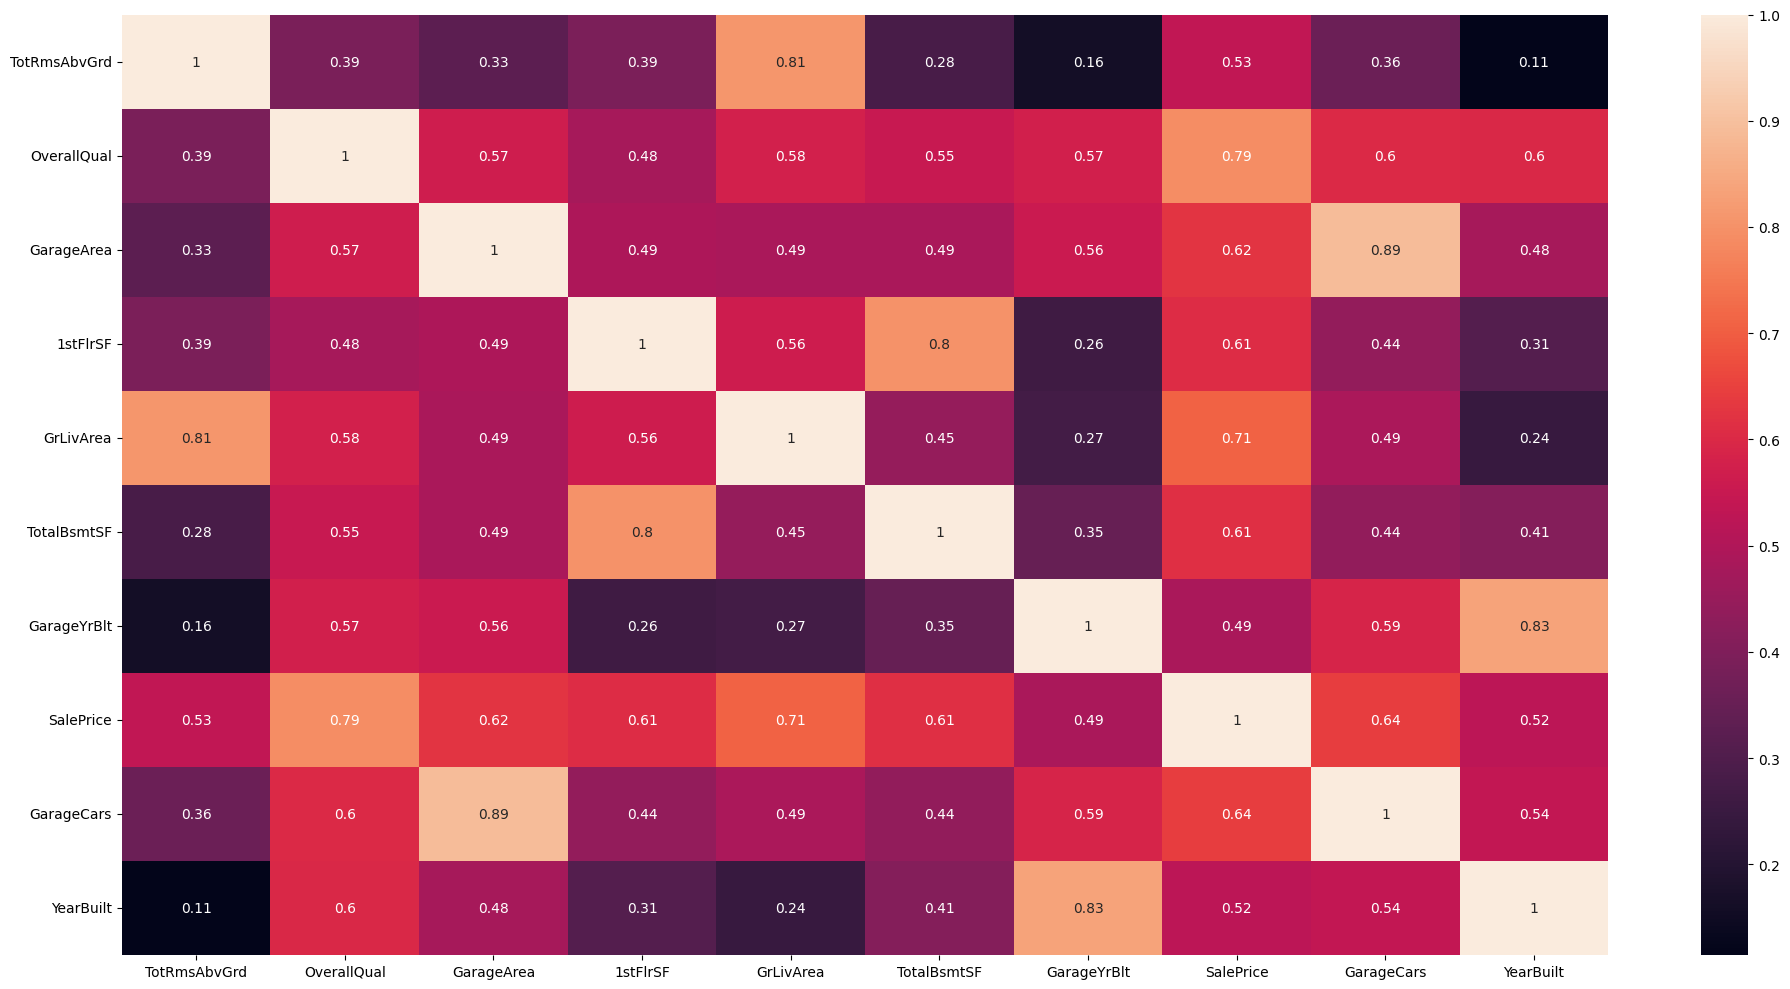

In [11]:
num_features = housing.select_dtypes(include=['int64','float64']).columns
housing_corr = housing[num_features].corr()
housing_corr_pairs = housing_corr.unstack()
housing_corr_sorted = housing_corr_pairs.sort_values(ascending=False)
housing_corr_sorted = housing_corr_sorted[housing_corr_sorted != 1]
top_corr_features = housing_corr_sorted.head(10).index
top_features = list(set([pair[0] for pair in top_corr_features] + [pair[1] for pair in top_corr_features]))
housing_corr_matrix = housing[top_features].corr()
plt.figure(figsize=(20,10))
sns.heatmap(housing_corr_matrix,annot=True)
plt.tight_layout()
plt.show()

# Checking for any sampling bias

In [12]:
from sklearn.model_selection import train_test_split,StratifiedShuffleSplit

train_set,test_set = train_test_split(housing,test_size=0.2,random_state=42)
len(train_set),len(test_set)

(2335, 584)

# Overall quality is highly correlated with the SalePrice
<li>We can categorize it</li>

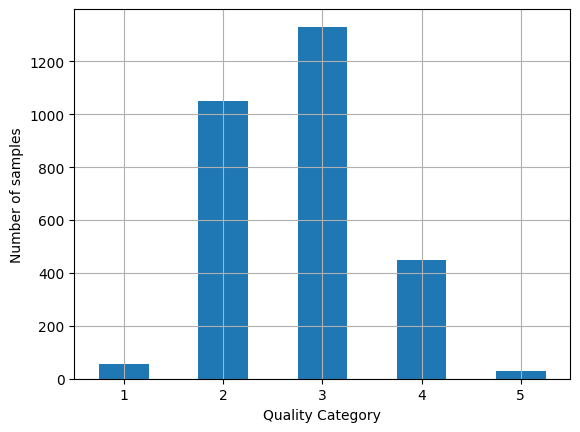

In [13]:
housing['Overall_Quality_cat'] = pd.cut(housing['OverallQual'],
                                        bins=[0,3,5,7,9,10],
                                       labels=[1,2,3,4,5]) 
housing['Overall_Quality_cat'].value_counts().sort_index().plot.bar(rot=0,grid=True)
plt.xlabel('Quality Category')
plt.ylabel('Number of samples')
plt.show()

In [14]:
strat_train_set,strat_test_set = train_test_split(housing,test_size=0.2,stratify=housing['Overall_Quality_cat'],random_state=42)
len(strat_train_set),len(strat_test_set) 

(2335, 584)

In [15]:
for _set in (strat_train_set,strat_test_set):
    _set.drop('Overall_Quality_cat',axis=1,inplace=True)

In [16]:
housing = strat_train_set.copy()

Addressing missing values

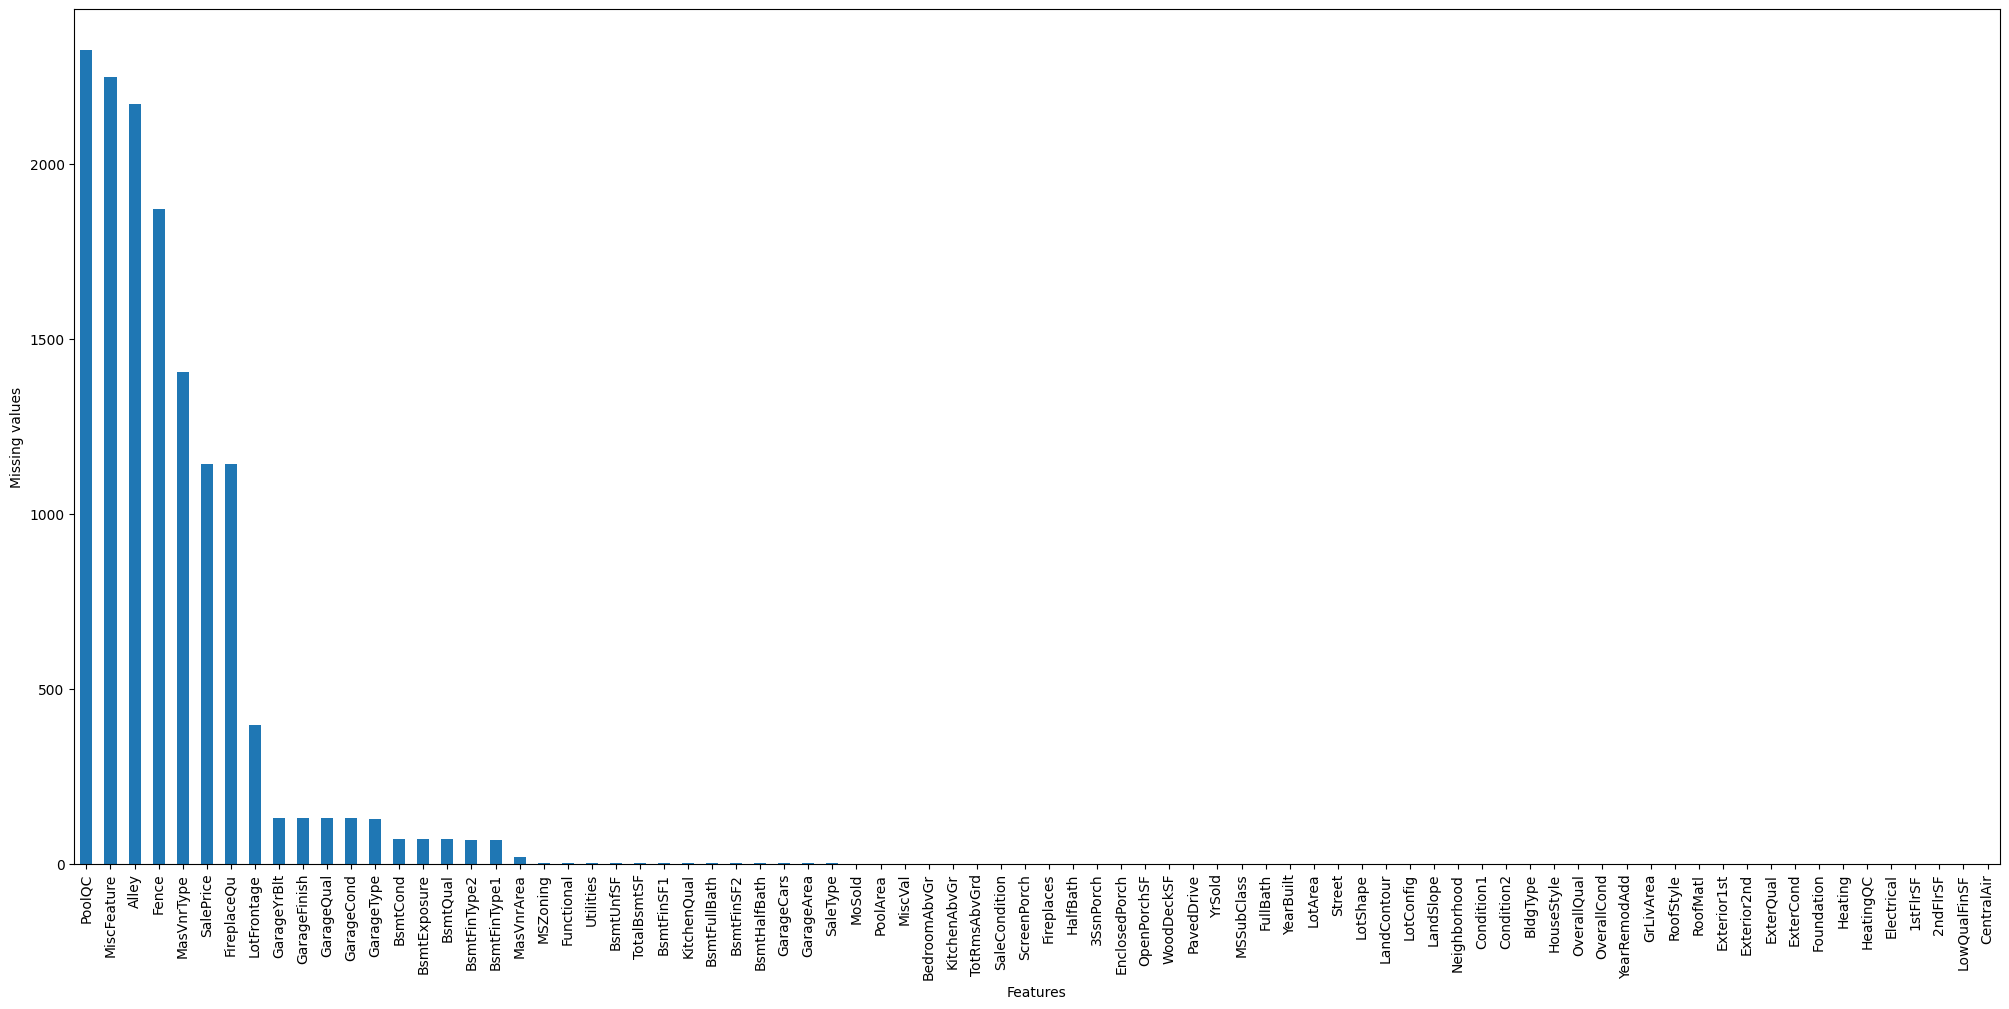

In [17]:
plt.figure(figsize=(20,10))
housing.isnull().sum().sort_values(ascending=False).plot(kind='bar')
plt.tight_layout()
plt.xlabel('Features')
plt.ylabel('Missing values')
plt.show()



In [18]:
num_features = housing.select_dtypes(include=['int64','float64']).columns
cat_features = housing.select_dtypes(include=['object','category']).columns
year_features = num_features[num_features.str.contains('Year|Yr',case=False)]
# num_features = num_features.difference(year_features)

print(year_features)
print(num_features)
print(cat_features)

Index(['YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'YrSold'], dtype='object')
Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
       'MoSold', 'YrSold', 'SalePrice'],
      dtype='object')
Index(['MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtQual', 'BsmtCo

In [19]:
for feature in year_features:
    housing[feature] = housing['YrSold'] - housing[feature]


In [20]:
from sklearn.impute import SimpleImputer 
imputer = SimpleImputer(strategy='median')
imputer.fit(housing[num_features])

SimpleImputer(strategy='median')

In [21]:
X = imputer.transform(housing[num_features])
X

array([[1.6000e+02, 2.1000e+01, 1.6800e+03, ..., 1.1000e+01, 0.0000e+00,
        1.0000e+05],
       [8.0000e+01, 6.9000e+01, 1.0970e+04, ..., 1.0000e+01, 0.0000e+00,
        1.4700e+05],
       [5.0000e+01, 6.9000e+01, 9.2600e+03, ..., 3.0000e+00, 0.0000e+00,
        1.6175e+05],
       ...,
       [2.0000e+01, 5.2000e+01, 5.1974e+04, ..., 6.0000e+00, 0.0000e+00,
        1.6175e+05],
       [5.0000e+01, 7.5000e+01, 9.0000e+03, ..., 1.0000e+00, 0.0000e+00,
        1.6175e+05],
       [6.0000e+01, 4.2000e+01, 8.4330e+03, ..., 6.0000e+00, 0.0000e+00,
        1.6175e+05]])

In [22]:
imputer.statistics_

array([5.0000e+01, 6.9000e+01, 9.4390e+03, 6.0000e+00, 5.0000e+00,
       3.5000e+01, 1.5000e+01, 0.0000e+00, 3.5900e+02, 0.0000e+00,
       4.7600e+02, 9.9100e+02, 1.0820e+03, 0.0000e+00, 0.0000e+00,
       1.4420e+03, 0.0000e+00, 0.0000e+00, 2.0000e+00, 0.0000e+00,
       3.0000e+00, 1.0000e+00, 6.0000e+00, 1.0000e+00, 2.9000e+01,
       2.0000e+00, 4.8000e+02, 0.0000e+00, 2.5000e+01, 0.0000e+00,
       0.0000e+00, 0.0000e+00, 0.0000e+00, 0.0000e+00, 6.0000e+00,
       0.0000e+00, 1.6175e+05])

In [23]:
housing_num = pd.DataFrame(X,columns=num_features,index=housing.select_dtypes(include=['int64','float64']).index)
housing_num.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
837,160.0,21.0,1680.0,6.0,5.0,35.0,35.0,158.0,330.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,11.0,0.0,100000.0
856,80.0,69.0,10970.0,6.0,6.0,30.0,30.0,0.0,505.0,435.0,...,0.0,0.0,34.0,0.0,0.0,0.0,0.0,10.0,0.0,147000.0
744,50.0,69.0,9260.0,5.0,4.0,70.0,58.0,0.0,0.0,0.0,...,64.0,0.0,0.0,0.0,100.0,0.0,0.0,3.0,0.0,161750.0
342,60.0,76.0,7570.0,6.0,5.0,45.0,45.0,420.0,0.0,0.0,...,0.0,55.0,0.0,0.0,0.0,0.0,0.0,3.0,0.0,161750.0
1268,50.0,69.0,14100.0,8.0,9.0,73.0,11.0,632.0,192.0,0.0,...,314.0,12.0,0.0,0.0,0.0,0.0,0.0,5.0,0.0,381000.0


In [24]:
cat_na_features = housing[cat_features].isnull().sum().loc[lambda x: x > 0].sort_values(ascending=False)
cat_na_features


PoolQC          2326
MiscFeature     2249
Alley           2171
Fence           1873
MasVnrType      1406
FireplaceQu     1142
GarageFinish     129
GarageQual       129
GarageCond       129
GarageType       127
BsmtCond          71
BsmtExposure      71
BsmtQual          70
BsmtFinType1      68
BsmtFinType2      68
MSZoning           2
Functional         2
Utilities          2
KitchenQual        1
SaleType           1
dtype: int64

In [25]:
housing.drop(columns=['PoolQC','MiscFeature','Alley','Fence','MasVnrType','FireplaceQu'],axis=1,inplace=True)

In [26]:
cat_features = housing.select_dtypes(include='object').columns 
cat_features

Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
       'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
       'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual', 'Functional',
       'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive',
       'SaleType', 'SaleCondition'],
      dtype='object')

In [27]:
for feature in cat_features:
    print(f"{feature} has {len(housing[feature].unique())} unique values")

MSZoning has 6 unique values
Street has 2 unique values
LotShape has 4 unique values
LandContour has 4 unique values
Utilities has 3 unique values
LotConfig has 5 unique values
LandSlope has 3 unique values
Neighborhood has 25 unique values
Condition1 has 9 unique values
Condition2 has 7 unique values
BldgType has 5 unique values
HouseStyle has 8 unique values
RoofStyle has 6 unique values
RoofMatl has 8 unique values
Exterior1st has 15 unique values
Exterior2nd has 16 unique values
ExterQual has 4 unique values
ExterCond has 5 unique values
Foundation has 6 unique values
BsmtQual has 5 unique values
BsmtCond has 5 unique values
BsmtExposure has 5 unique values
BsmtFinType1 has 7 unique values
BsmtFinType2 has 7 unique values
Heating has 6 unique values
HeatingQC has 5 unique values
CentralAir has 2 unique values
Electrical has 5 unique values
KitchenQual has 5 unique values
Functional has 8 unique values
GarageType has 7 unique values
GarageFinish has 4 unique values
GarageQual has 6 

In [28]:
housing[cat_features].head(10)

,MSZoning,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,...,Electrical,KitchenQual,Functional,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,SaleType,SaleCondition
837,RM,Pave,Reg,Lvl,AllPub,Inside,Gtl,BrDale,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
856,RL,Pave,IR1,Low,AllPub,Inside,Mod,CollgCr,Norm,Norm,...,SBrkr,TA,Typ,Detchd,Unf,TA,Fa,Y,WD,Normal
744,RL,Pave,IR1,HLS,AllPub,Inside,Gtl,Crawfor,Feedr,Norm,...,FuseF,TA,Typ,Detchd,Unf,TA,TA,Y,WD,Normal
342,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,NAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
1268,RL,Pave,IR1,Lvl,AllPub,Inside,Mod,Crawfor,Norm,Norm,...,SBrkr,Gd,Typ,BuiltIn,Unf,TA,TA,Y,WD,Normal
721,RL,Pave,Reg,Lvl,AllPub,Corner,Gtl,CollgCr,Norm,Norm,...,SBrkr,Gd,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
712,RL,Pave,IR1,Lvl,AllPub,CulDSac,Gtl,CollgCr,Norm,Norm,...,SBrkr,TA,Min2,Attchd,Fin,TA,TA,Y,WD,Normal
1455,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,Gilbert,Norm,Norm,...,SBrkr,TA,Typ,Attchd,RFn,TA,TA,Y,WD,Normal
611,RL,Pave,IR1,Lvl,AllPub,FR2,Gtl,NWAmes,Norm,Norm,...,SBrkr,TA,Typ,Attchd,Unf,TA,TA,Y,WD,Normal
509,RL,Pave,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,...,SBrkr,Ex,Typ,BuiltIn,Fin,TA,TA,Y,WD,Abnorml


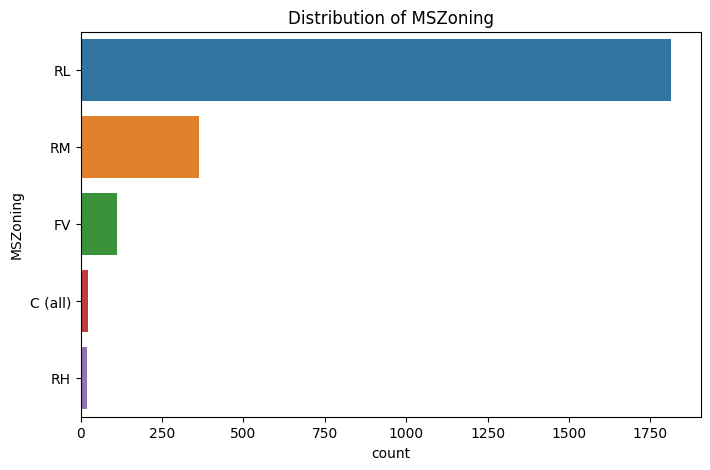

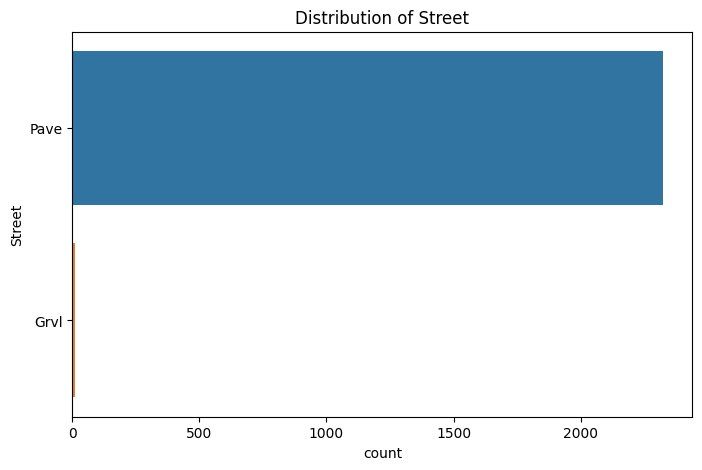

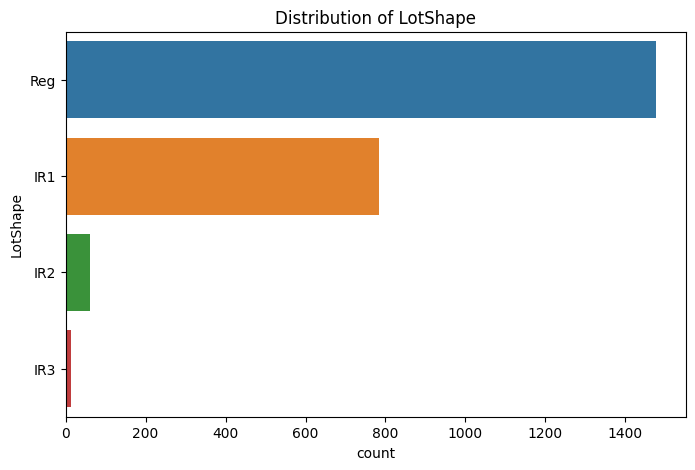

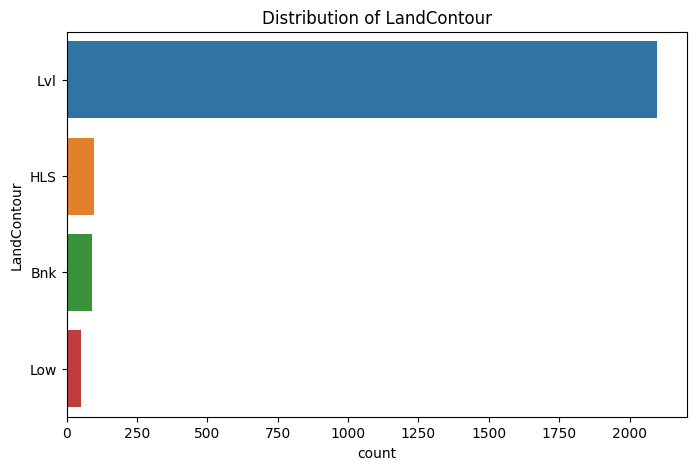

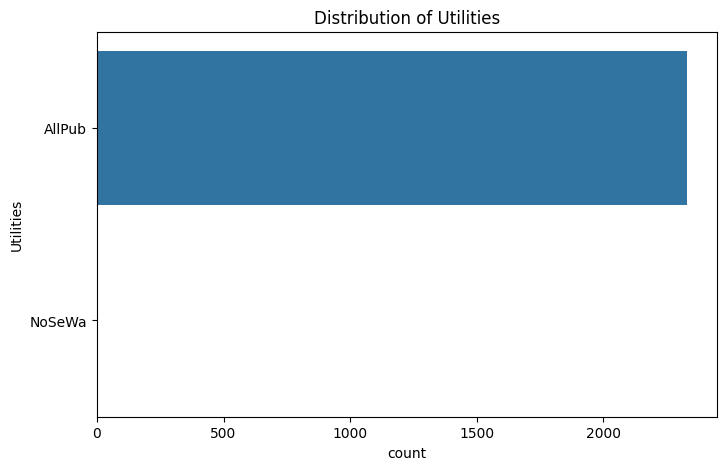

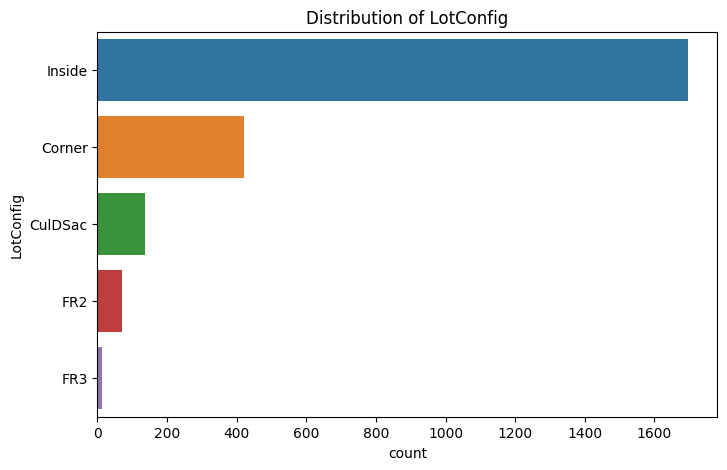

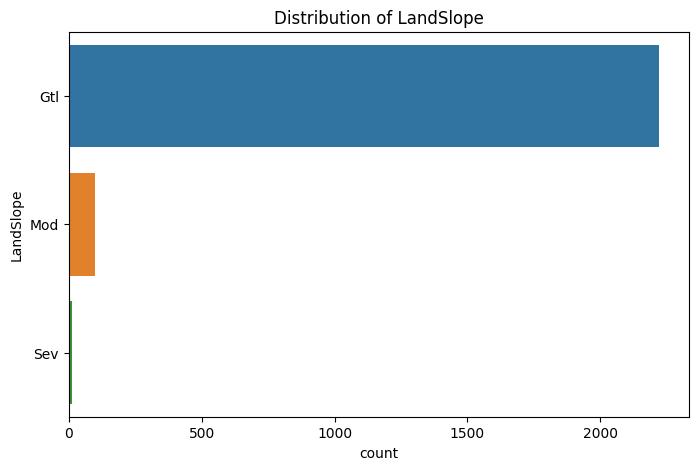

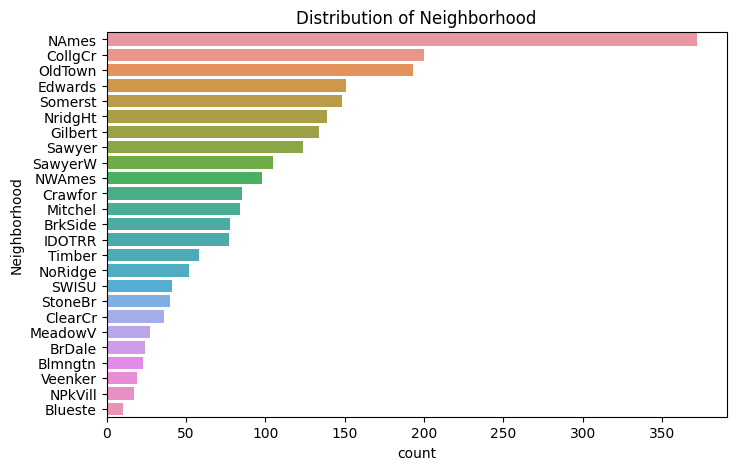

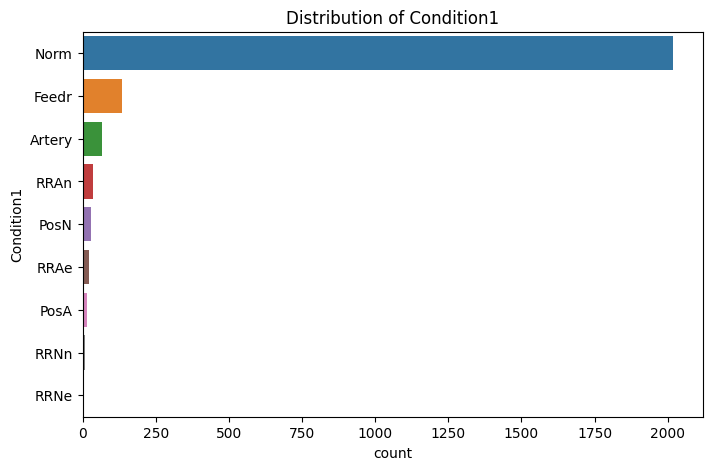

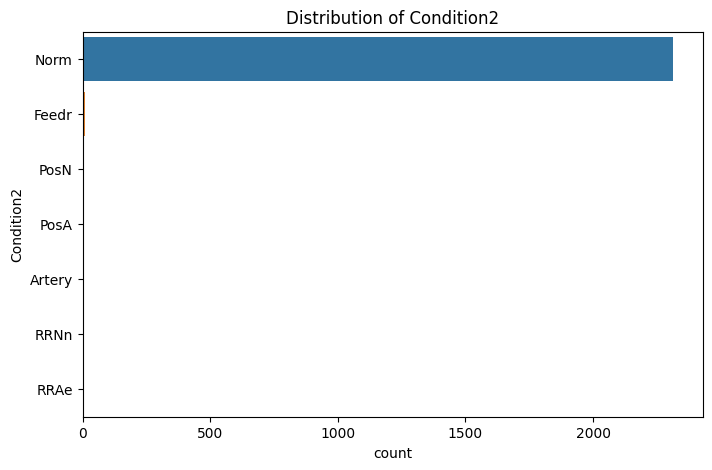

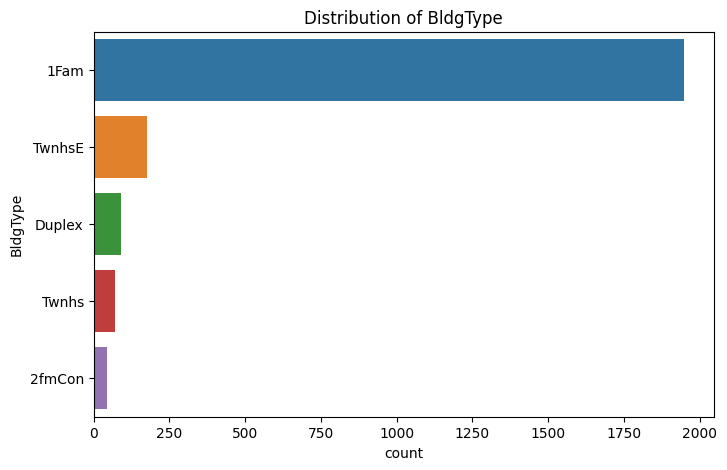

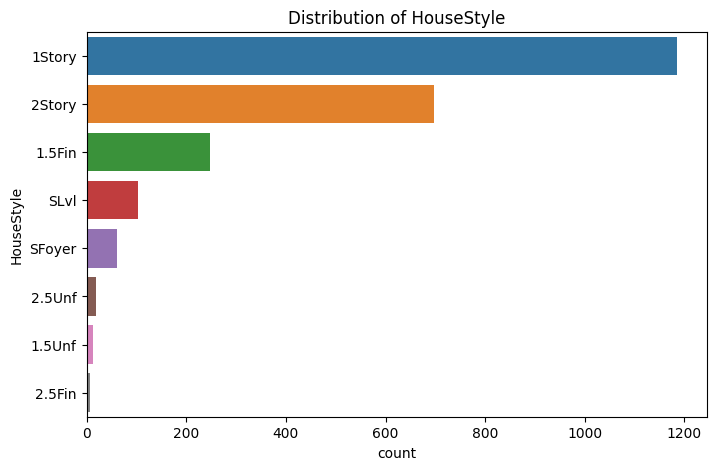

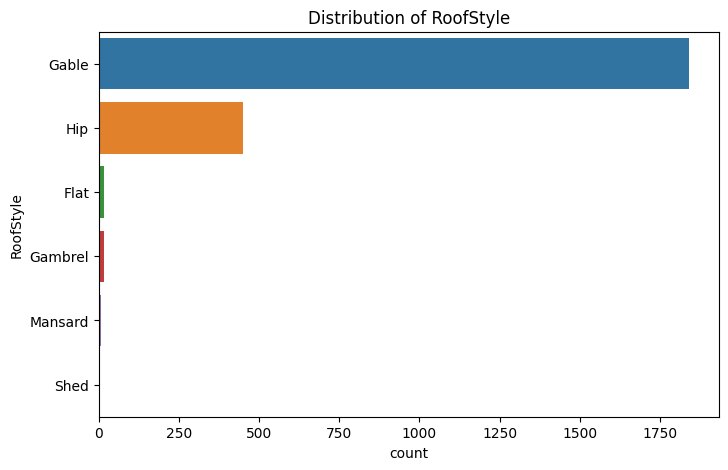

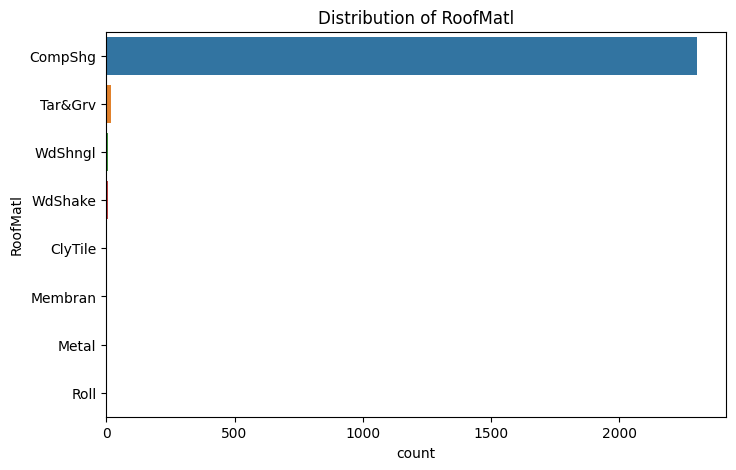

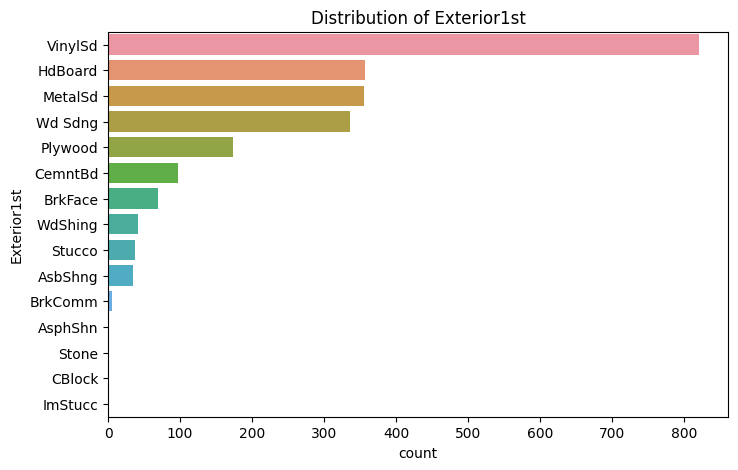

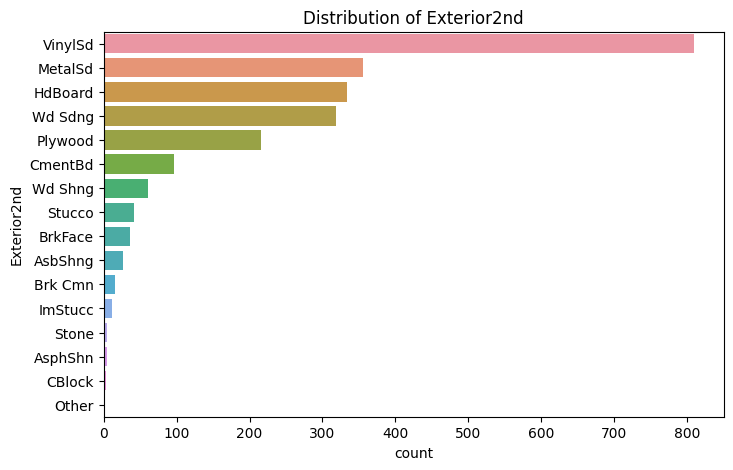

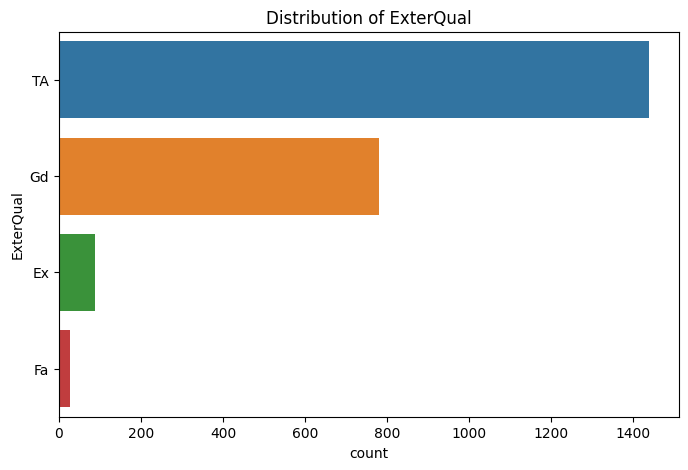

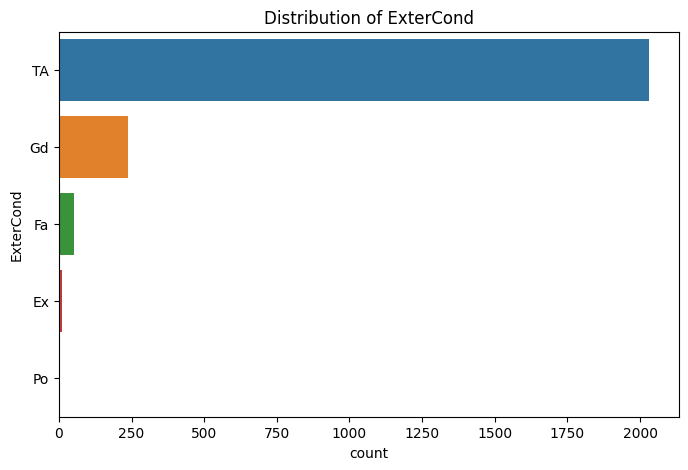

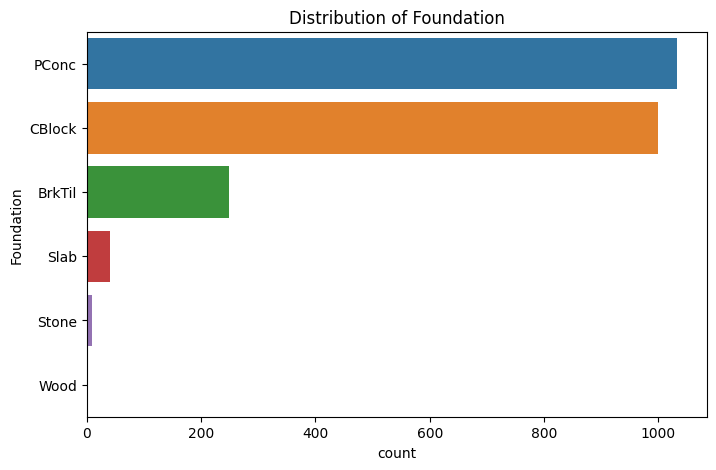

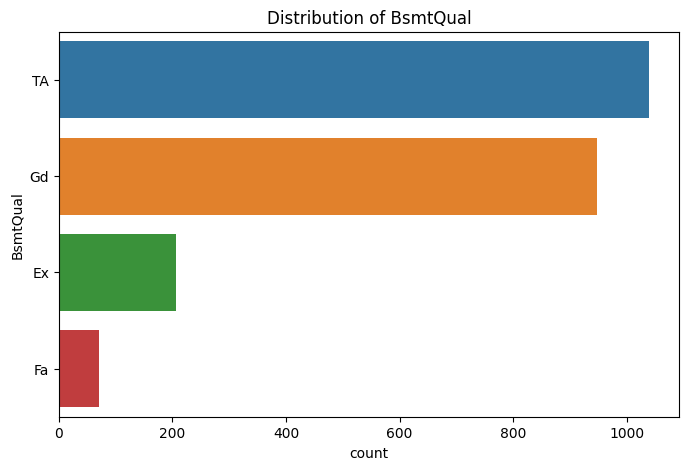

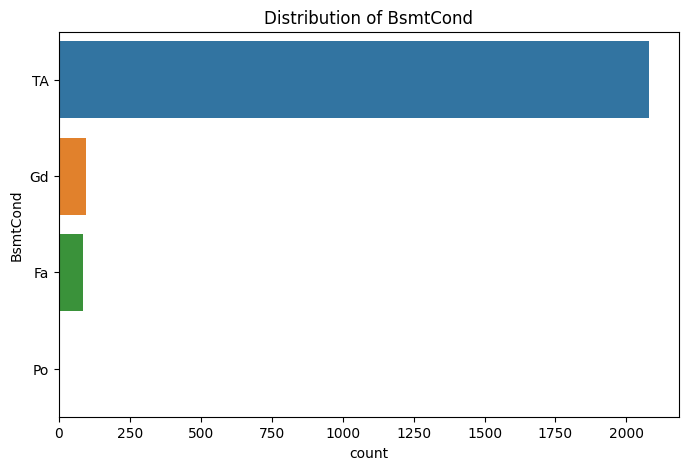

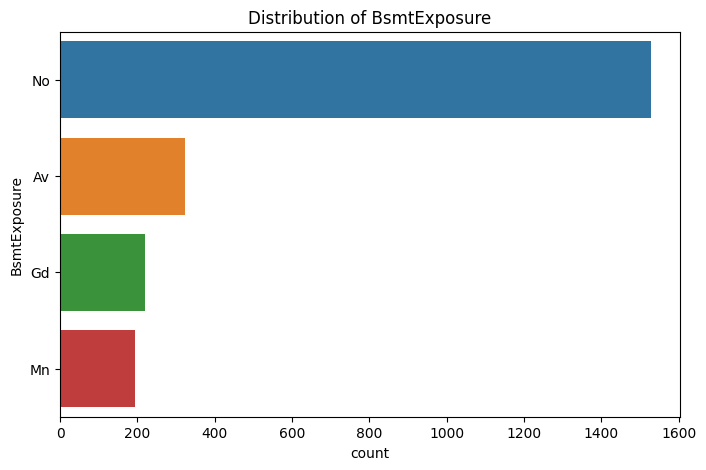

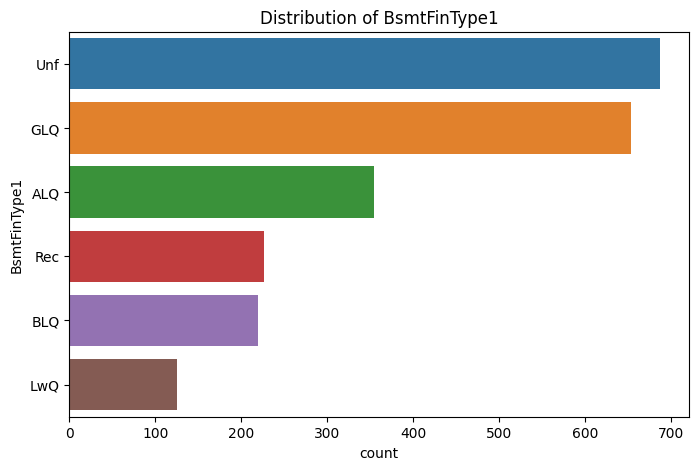

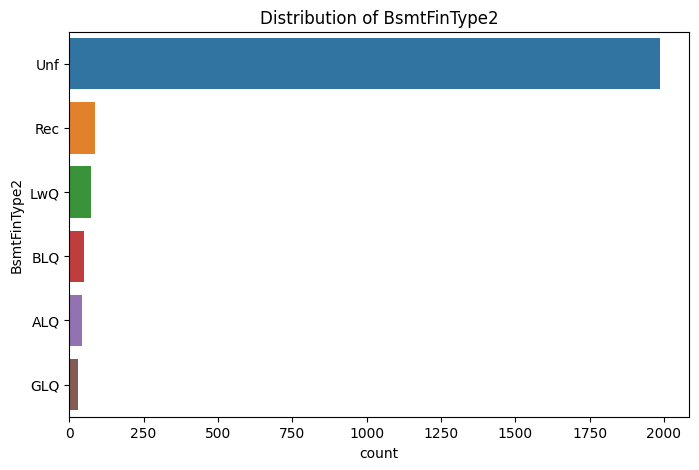

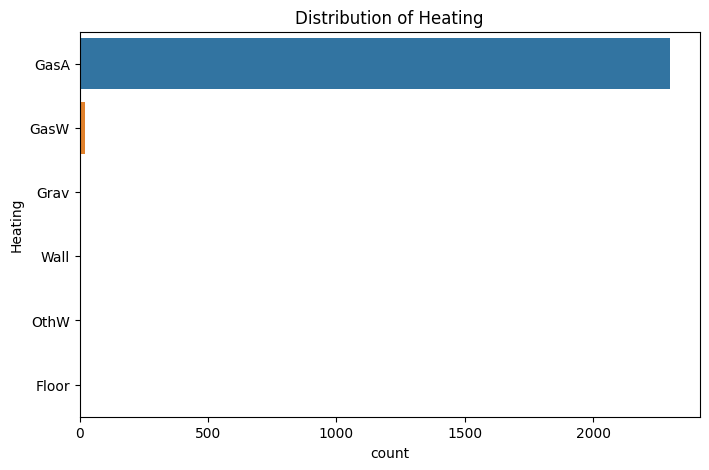

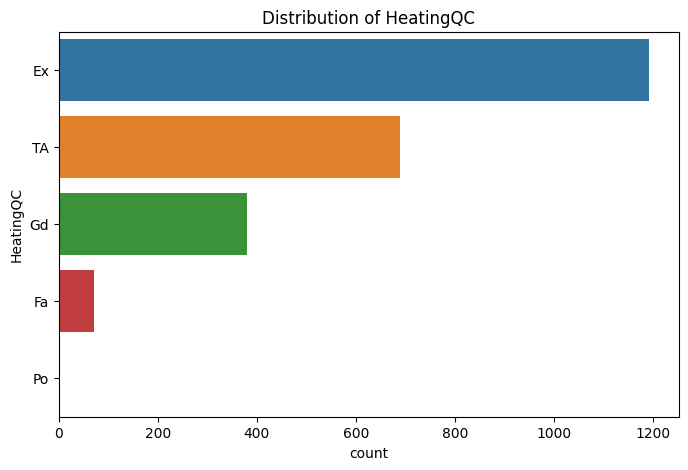

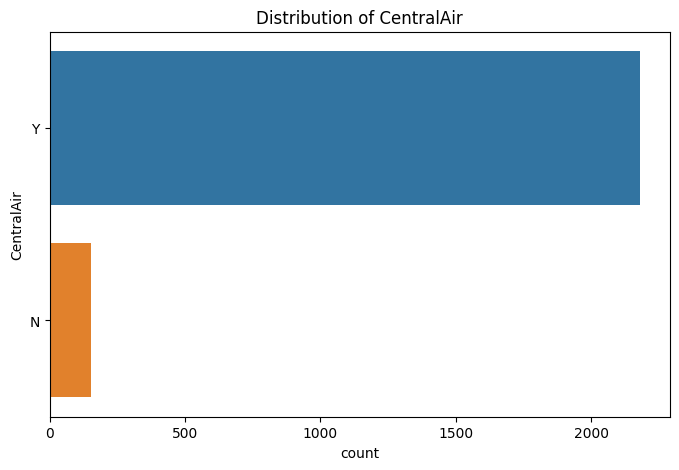

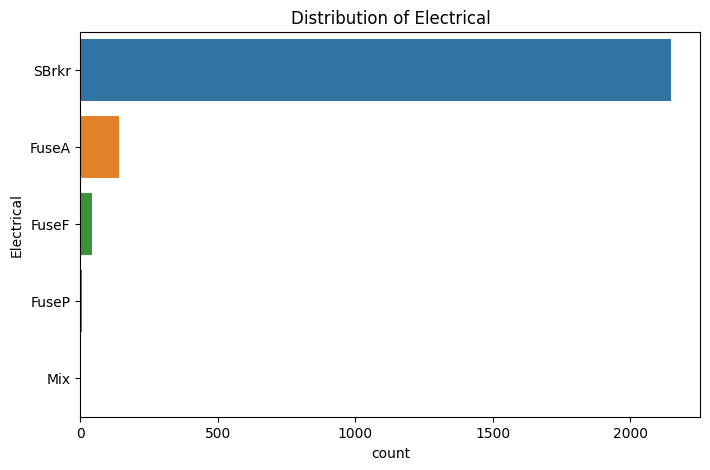

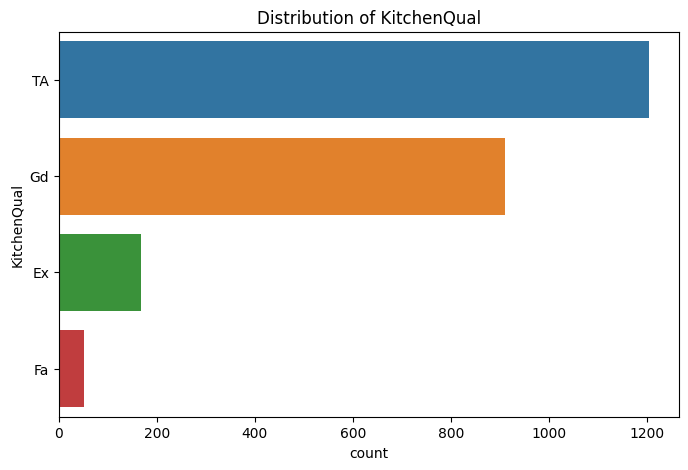

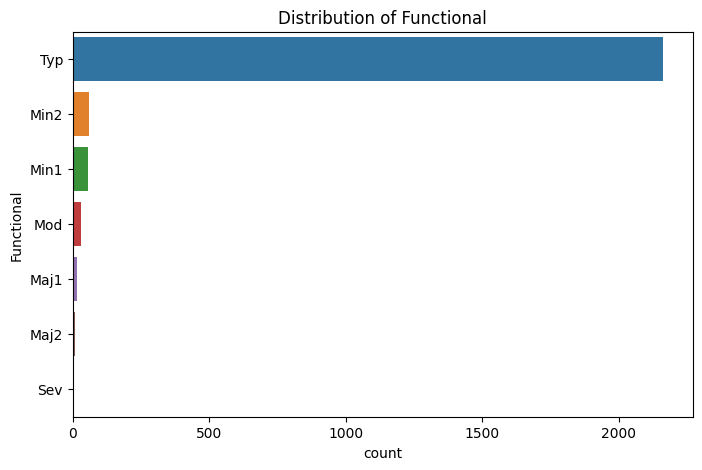

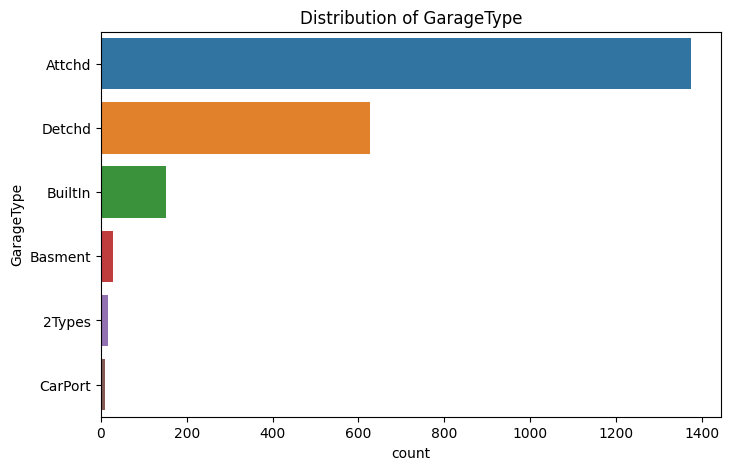

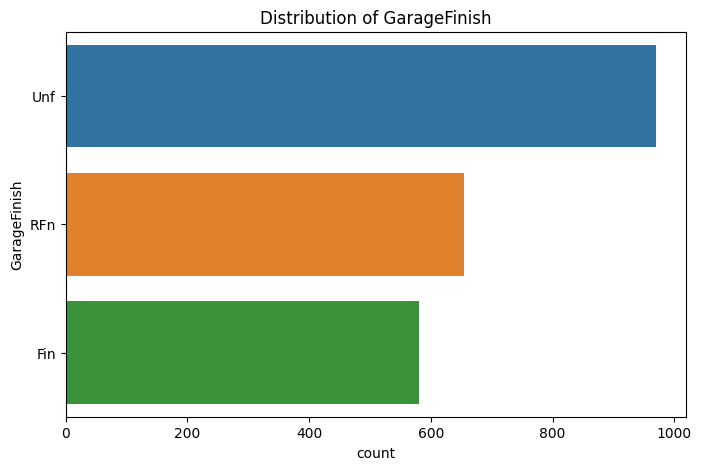

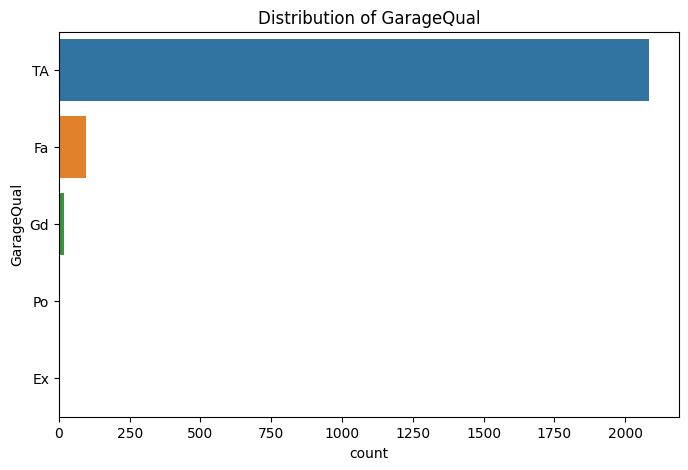

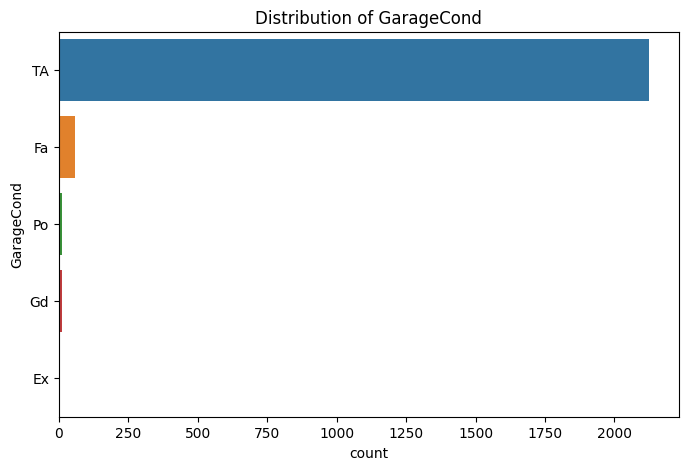

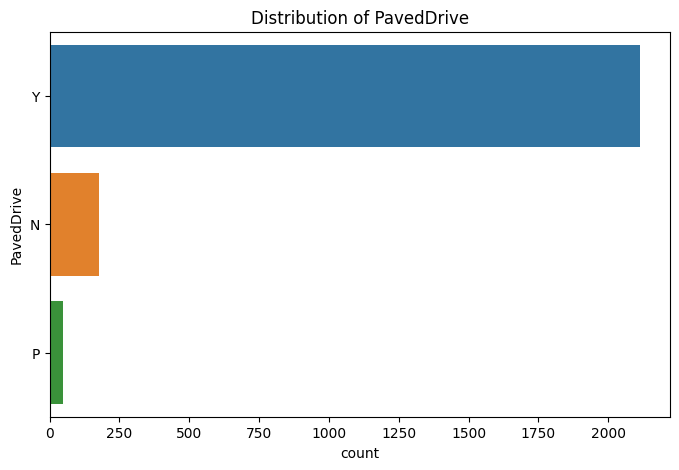

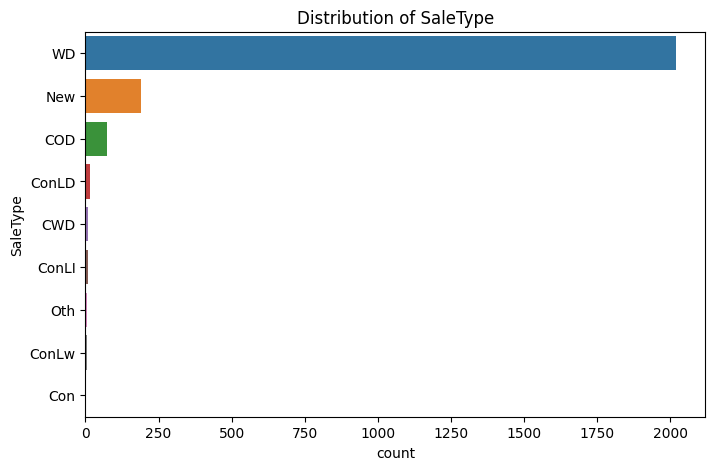

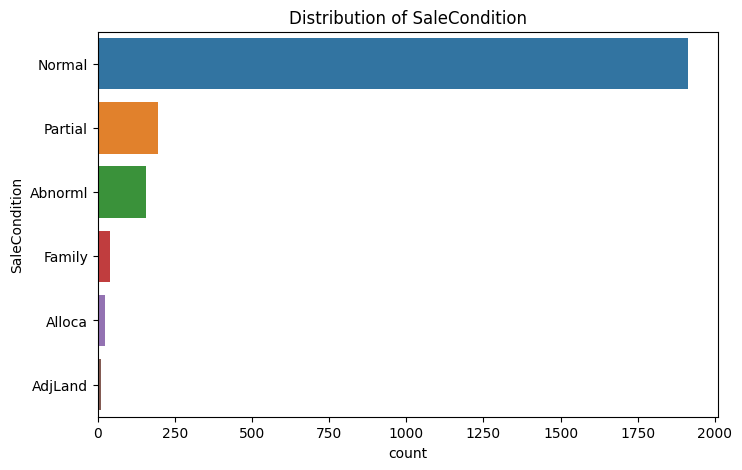

In [29]:
for feature in cat_features:
    plt.figure(figsize=(8, 5))
    sns.countplot(y=housing[feature], order=housing[feature].value_counts().index)
    plt.title(f"Distribution of {feature}")
    plt.show()


# Performing ordinal encoding and one hot encoding

Review this step once

In [30]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder

# First, check for and handle invalid values
def clean_dataframe(df):
    """
    Clean the dataframe by handling NaN, infinite values, and other invalid data
    """
    # Make a copy to avoid modifying the original
    df = df.copy()
    
    # Replace infinite values with NaN
    df = df.replace([np.inf, -np.inf], np.nan)
    
    # For numeric columns, fill NaN with median
    numeric_columns = df.select_dtypes(include=[np.number]).columns
    for col in numeric_columns:
        df[col] = df[col].fillna(df[col].median())
    
    # For categorical columns, fill NaN with mode
    categorical_columns = df.select_dtypes(include=['object']).columns
    for col in categorical_columns:
        df[col] = df[col].fillna(df[col].mode()[0])
    
    return df

# Clean the housing dataframe
housing = clean_dataframe(housing)

# Define feature lists
ordinal_features = [
    'ExterQual', 'ExterCond', 'BsmtQual', 'BsmtCond', 'Functional', 
    'HeatingQC', 'KitchenQual', 'GarageQual', 'GarageCond'
]

nominal_features = [
    'MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities', 
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 
    'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 
    'Exterior2nd', 'Foundation', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 
    'Heating', 'CentralAir', 'Electrical', 'GarageType', 'GarageFinish', 
    'PavedDrive', 'SaleType', 'SaleCondition'
]

# Create encoders
ordinal_encoder = OrdinalEncoder(handle_unknown='use_encoded_value', unknown_value=-1)
one_hot_encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')

# Handle Neighborhood separately
if 'Neighborhood' in housing.columns:
    neighborhood_avg_price = housing.groupby('Neighborhood')['SalePrice'].mean()
    housing['Neighborhood'] = housing['Neighborhood'].map(neighborhood_avg_price)
else:
    raise ValueError("Column 'Neighborhood' not found in the DataFrame.")

# Apply Ordinal Encoding
housing[ordinal_features] = ordinal_encoder.fit_transform(housing[ordinal_features])

# Remove Neighborhood from nominal features before one-hot encoding
nominal_features_without_neighborhood = [f for f in nominal_features if f != 'Neighborhood']

# Apply One-Hot Encoding
one_hot_encoded = one_hot_encoder.fit_transform(housing[nominal_features_without_neighborhood])

# Get feature names using the correct feature list
one_hot_columns = one_hot_encoder.get_feature_names_out(nominal_features_without_neighborhood)

# Create DataFrame with one-hot encoded features
one_hot_df = pd.DataFrame(one_hot_encoded, columns=one_hot_columns)

# Reset indices
housing.reset_index(drop=True, inplace=True)
one_hot_df.reset_index(drop=True, inplace=True)

# Drop original nominal features and concatenate
housing = housing.drop(columns=nominal_features_without_neighborhood)
housing = pd.concat([housing, one_hot_df], axis=1)

# Separate target variable
housing_labels = housing['SalePrice']
housing.drop('SalePrice', axis=1, inplace=True)

# Verify no invalid values remain
print("Number of infinite values:", np.isinf(housing.values).sum())
print("Number of NaN values:", np.isnan(housing.values).sum())

# Display first few rows
print("\nFirst few rows of cleaned and encoded data:")
print(housing.head())

Number of infinite values: 0
Number of NaN values: 0

First few rows of cleaned and encoded data:
   MSSubClass  LotFrontage  LotArea   Neighborhood  OverallQual  OverallCond  \
0         160         21.0     1680  127725.000000            6            5   
1          80         69.0    10970  180182.020000            6            6   
2          50         69.0     9260  182108.952941            5            4   
3          60         76.0     7570  152872.561828            6            5   
4          50         69.0    14100  182108.952941            8            9   

   YearBuilt  YearRemodAdd  MasVnrArea  ExterQual  ...  SaleType_ConLw  \
0         35            35       158.0        3.0  ...             0.0   
1         30            30         0.0        3.0  ...             0.0   
2         70            58         0.0        3.0  ...             0.0   
3         45            45       420.0        3.0  ...             0.0   
4         73            11       632.0        3.0  

In [31]:
housing.isnull().sum()

MSSubClass               0
LotFrontage              0
LotArea                  0
Neighborhood             0
OverallQual              0
                        ..
SaleCondition_AdjLand    0
SaleCondition_Alloca     0
SaleCondition_Family     0
SaleCondition_Normal     0
SaleCondition_Partial    0
Length: 207, dtype: int64

In [32]:
housing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Columns: 207 entries, MSSubClass to SaleCondition_Partial
dtypes: float64(182), int64(25)
memory usage: 3.7 MB


Applying Standardization

In [34]:
from sklearn.preprocessing import StandardScaler 

std_scaler = StandardScaler()
housing_std_scaled = std_scaler.fit_transform(housing)
housing_std_scaled

array([[ 2.46756226, -2.26894133, -1.02079074, ..., -0.13033059,
         0.46899702, -0.30186337],
       [ 0.5601691 , -0.02862362,  0.08474821, ..., -0.13033059,
         0.46899702, -0.30186337],
       [-0.15510333, -0.02862362, -0.11874712, ..., -0.13033059,
         0.46899702, -0.30186337],
       ...,
       [-0.87037576, -0.82206947,  4.96435198, ..., -0.13033059,
        -2.13220972,  3.31275701],
       [-0.15510333,  0.2514161 , -0.14968793, ..., -0.13033059,
         0.46899702, -0.30186337],
       [ 0.08332081, -1.28880233, -0.2171627 , ..., -0.13033059,
         0.46899702, -0.30186337]])

# Building model

In [51]:
housing = housing_std_scaled.copy()

In [56]:
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import mean_squared_error 
from sklearn.tree import DecisionTreeRegressor 
from sklearn.ensemble import RandomForestRegressor 
from sklearn.model_selection import cross_val_score

In [58]:
lin_reg = LinearRegression()
lin_reg.fit(housing,housing_labels)
lin_reg_predictions = lin_reg.predict(housing)
lin_reg_rmse = mean_squared_error(housing_labels,lin_reg_predictions,squared=False)**0.5
print(f"RMSE of the linear regression model: {lin_reg_rmse}")
lin_reg_rmses = -cross_val_score(lin_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
print(lin_reg_rmses)

RMSE of the linear regression model: 202.42459422882848
[5.04326774e+04 4.04672751e+17 5.48855104e+04 6.80882888e+17
 2.14524895e+18 2.65987518e+17 3.70754924e+04 5.04634814e+04
 1.42911371e+16 9.46055954e+17]


In [60]:
 pd.Series(lin_reg_rmses).describe()

count    1.000000e+01
mean     4.457139e+17
std      6.838471e+17
min      3.707549e+04
25%      5.156899e+04
50%      1.401393e+17
75%      6.118304e+17
max      2.145249e+18
dtype: float64

In [65]:
tree_reg = DecisionTreeRegressor(random_state=42)
tree_reg.fit(housing,housing_labels)
tree_reg_predictions = tree_reg.predict(housing)
tree_reg_rmse = mean_squared_error(housing_labels,tree_reg_predictions,squared=False)**0.5
print(f"RMSE of the Decision tree regression model: {tree_reg_rmse}")
tree_reg_rmses = -cross_val_score(tree_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
print(tree_reg_rmses)
pd.Series(tree_reg_rmses).describe()


RMSE of the Decision tree regression model: 14.490945743832022
[69126.57935897 70300.1152778  67927.31702254 51349.63370108
 64796.62206698 63672.22716829 48431.22093844 65600.46949893
 52524.87443716 63780.92821721]


count       10.000000
mean     61750.998769
std       7946.108163
min      48431.220938
25%      55311.712620
50%      64288.775142
75%      67345.605142
max      70300.115278
dtype: float64

In [67]:
forest_reg = forest = RandomForestRegressor(n_estimators = 100,verbose=3,n_jobs=-1)
forest_reg.fit(housing,housing_labels)
forest_reg_predictions = forest_reg.predict(housing)
forest_reg_rmse = mean_squared_error(housing_labels,forest_reg_predictions,squared=False)**0.5
print(f"RMSE of the Random forest tree regression model: {forest_reg_rmse}")
forest_reg_rmses = -cross_val_score(forest_reg, housing, housing_labels,
                              scoring="neg_root_mean_squared_error", cv=10)
print(forest_reg_rmses)
pd.Series(forest_reg_rmses).describe()

[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100building tree 12 of 100

building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.5s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.0s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 5 of 100
building tree 6 of 100building tree 7 of 100building tree 8 of 100


building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.5s


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100building tree 38 of 100

building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100
building tree 3 of 100building tree 4 of 100


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100building tree 18 of 100

building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.5s


building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100building tree 12 of 100

building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100building tree 31 of 100

building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100building tree 42 of 100

building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100building tree 51 of 100

building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100building tree 74 of 100

building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.5s


building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77 of 100
building tree 78 of 100
building tree 79 of 100
building tree 80 of 100
building tree 81

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100building tree 27 of 100
building tree 28 of 100



[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100building tree 55 of 100

building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100building tree 64 of 100

building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100building tree 2 of 100

building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100building tree 26 of 100

building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100building tree 62 of 100

building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100building tree 75 of 100

building tree 76 of 100
building tree 77 of 100
building tree 78

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 5 of 100
building tree 6 of 100
building tree 7 of 100
building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100

[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.6s



building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 7

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    2.1s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 5 of 100building tree 6 of 100

building tree 7 of 100building tree 8 of 100

building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.4s


building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100
building tree 36 of 100
building tree 37 of 100building tree 38 of 100

building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.8s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished
[Parallel(n_jobs=-1)]: Using backend ThreadingBackend with 4 concurrent workers.


building tree 1 of 100
building tree 2 of 100
building tree 3 of 100
building tree 4 of 100
building tree 5 of 100
building tree 6 of 100building tree 7 of 100

building tree 8 of 100
building tree 9 of 100
building tree 10 of 100
building tree 11 of 100
building tree 12 of 100
building tree 13 of 100
building tree 14 of 100
building tree 15 of 100
building tree 16 of 100
building tree 17 of 100
building tree 18 of 100
building tree 19 of 100
building tree 20 of 100
building tree 21 of 100
building tree 22 of 100
building tree 23 of 100
building tree 24 of 100
building tree 25 of 100
building tree 26 of 100
building tree 27 of 100
building tree 28 of 100
building tree 29 of 100
building tree 30 of 100
building tree 31 of 100
building tree 32 of 100
building tree 33 of 100
building tree 34 of 100
building tree 35 of 100


[Parallel(n_jobs=-1)]: Done  24 tasks      | elapsed:    0.5s


building tree 36 of 100
building tree 37 of 100
building tree 38 of 100
building tree 39 of 100
building tree 40 of 100
building tree 41 of 100
building tree 42 of 100
building tree 43 of 100
building tree 44 of 100
building tree 45 of 100
building tree 46 of 100
building tree 47 of 100
building tree 48 of 100
building tree 49 of 100
building tree 50 of 100
building tree 51 of 100
building tree 52 of 100
building tree 53 of 100
building tree 54 of 100
building tree 55 of 100
building tree 56 of 100
building tree 57 of 100
building tree 58 of 100
building tree 59 of 100
building tree 60 of 100
building tree 61 of 100
building tree 62 of 100
building tree 63 of 100
building tree 64 of 100
building tree 65 of 100
building tree 66 of 100
building tree 67 of 100
building tree 68 of 100
building tree 69 of 100
building tree 70 of 100
building tree 71 of 100
building tree 72 of 100
building tree 73 of 100
building tree 74 of 100
building tree 75 of 100
building tree 76 of 100
building tree 77

[Parallel(n_jobs=-1)]: Done 100 out of 100 | elapsed:    1.9s finished
[Parallel(n_jobs=4)]: Using backend ThreadingBackend with 4 concurrent workers.
[Parallel(n_jobs=4)]: Done  24 tasks      | elapsed:    0.0s
[Parallel(n_jobs=4)]: Done 100 out of 100 | elapsed:    0.0s finished


count       10.000000
mean     44267.333940
std       6009.721378
min      34880.968371
25%      40368.988526
50%      43582.128708
75%      47662.676905
max      55802.108975
dtype: float64